# Chronos results

In [1]:
%load_ext autoreload
%autoreload 2

Required imports

In [4]:
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from utils.train_synthetic import run_synthetic_experiments
from utils.results import get_joint_coverages, get_interval_widths, plot_timeseries

# Our imports
import torch, itertools, os
import chronos

# from models.chronos import naive_quantile_int

device = torch.device(
    'cuda' if torch.cuda.is_available() else 
    'mps' if torch.backends.mps.is_available() else 
    'cpu'
)
device

device(type='mps')

In [3]:
BASELINES = ['QRNN', 'DPRNN', 'CFRNN', 'AdaptiveCFRNN']

# Static noise profile

In [ ]:
# NOTE: now has "rag" -- just pass in 'rag': True to pred_kwargs

pipeline = chronos.ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-tiny", # just to test
    device_map = device,
    torch_dtype = torch.bfloat16,
)

run_synthetic_experiments(
        experiment = 'static', 
        baseline = 'CHRONOS_CONFORMAL',
        n_train = 100,
        retrain_auxiliary = False,
        recompute_dataset = True,
        save_model = False,
        save_results = True,
        rnn_mode = 'LSTM',
        # horizon=horizon,
        chronos_kwargs = {
            'pipeline': pipeline,
            'pred_kwargs':{'num_samples': 10, 'limit_prediction_length': False, 'rag': False},
        },
        # extra_path_info=extra_path_info,
        seed = 0
    )

**Joint coverage** 

Prints mean joint coverage across the horizon (mean±std of 5 random seeds, with each row indicating a different dataset)

In [7]:
files = lambda setting, experiment: [i for i in os.listdir('saved_results/') if setting in i and experiment in i]
files('size_effect', 'static')

['static-CHRONOS_CONFORMAL_size_effect_size=tiny-1-horizon100.pkl',
 'static-CHRONOS_CONFORMAL_size_effect_size=small-2-horizon100.pkl',
 'static-CHRONOS_CONFORMAL_size_effect_size=tiny-4.pkl',
 'static-CHRONOS_CONFORMAL_size_effect_size=tiny-1.pkl',
 'static-CHRONOS_CONFORMAL_size_effect_size=tiny-0.pkl',
 'static-CHRONOS_CONFORMAL_size_effect_size=tiny-0-horizon100.pkl',
 'static-CHRONOS_CONFORMAL_size_effect_size=tiny-2.pkl',
 'static-CHRONOS_CONFORMAL_size_effect_size=tiny-3.pkl',
 'static-CHRONOS_CONFORMAL_size_effect_size=small-2.pkl',
 'static-CHRONOS_CONFORMAL_size_effect_size=tiny-2-horizon100.pkl',
 'static-CHRONOS_CONFORMAL_size_effect_size=small-3.pkl',
 'static-CHRONOS_CONFORMAL_size_effect_size=small-1.pkl',
 'static-CHRONOS_CONFORMAL_size_effect_size=small-1-horizon100.pkl',
 'static-CHRONOS_CONFORMAL_size_effect_size=small-0.pkl',
 'static-CHRONOS_CONFORMAL_size_effect_size=small-4.pkl',
 'static-CHRONOS_CONFORMAL_size_effect_size=small-0-horizon100.pkl',
 'static-CHRON

In [13]:
for baseline in ['CHRONOS_CONFORMAL']:
    for size in ['tiny', 'small']:#, 'base', 'large']:

        print(baseline, size)
        coverages_mean, coverages_std = get_joint_coverages(baseline, 'static', seeds=range(5), extra_path_info=f"size_effect_size={size}")
        
        for m, s in zip(coverages_mean, coverages_std): print('{:.1f} \\(\\pm\\) {:.1f}\\%'.format(m, s))
        print()

CHRONOS_CONFORMAL tiny
93.5 \(\pm\) 1.3\%
93.8 \(\pm\) 2.2\%
93.8 \(\pm\) 0.8\%
94.2 \(\pm\) 1.5\%
93.5 \(\pm\) 1.2\%

CHRONOS_CONFORMAL small
94.0 \(\pm\) 2.0\%
94.4 \(\pm\) 1.6\%
93.7 \(\pm\) 1.0\%
93.8 \(\pm\) 1.7\%
94.4 \(\pm\) 0.7\%



In [ ]:
for baseline in ['CFRNN', 'AdaptiveCFRNN', 'QRNN', 'DPRNN']:
    print(baseline)
    coverages_mean, coverages_std = get_joint_coverages(baseline, 'static', seeds=range(5))
    
    for m, s in zip(coverages_mean, coverages_std):
        print('{:.1f} \\(\\pm\\) {:.1f}\\%'.format(m, s))
    print()

CFRNN
92.8 \(\pm\) 0.8\%
94.0 \(\pm\) 0.4\%
94.6 \(\pm\) 1.6\%
94.3 \(\pm\) 1.4\%
94.3 \(\pm\) 1.4\%

AdaptiveCFRNN
93.6 \(\pm\) 0.4\%
94.7 \(\pm\) 1.0\%
93.6 \(\pm\) 0.3\%
94.2 \(\pm\) 1.3\%
93.7 \(\pm\) 1.1\%

QRNN
65.0 \(\pm\) 2.7\%
65.6 \(\pm\) 3.4\%
66.4 \(\pm\) 1.9\%
65.2 \(\pm\) 4.4\%
67.2 \(\pm\) 1.6\%

DPRNN
5.4 \(\pm\) 0.5\%
5.6 \(\pm\) 1.0\%
5.0 \(\pm\) 0.9\%
4.7 \(\pm\) 1.0\%
4.2 \(\pm\) 1.0\%



In [14]:
for baseline in ['CHRONOS_CONFORMAL']:
    for size in ['tiny', 'small']:#, 'base', 'large']:

        print(baseline, size)
        widths_mean, widths_std = get_interval_widths(baseline, 'static', seeds=range(5), extra_path_info=f"size_effect_size={size}")
        
        print(widths_mean)
        print(widths_std)

        print()

CHRONOS_CONFORMAL tiny
[16.68251652 16.80337021 16.71275578 16.84816319 17.07076515]
[4.21426674 4.03221765 3.88479809 4.03255696 4.02926001]

CHRONOS_CONFORMAL small
[17.12536289 17.3873914  17.14014587 17.38798134 17.69375641]
[4.28921352 4.3481547  4.23309576 4.2607681  4.25421642]



In [5]:
for baseline in ['CHRONOS_CONFORMAL']:
    for rag in [True, False]:
        print(baseline, 'RAG', rag)
        widths_mean, widths_std = get_interval_widths(baseline, 'static', seeds=range(5), extra_path_info=f"rag={rag}")
        
        print(widths_mean)
        print(widths_std)

        print()

CHRONOS_CONFORMAL RAG True
[16.7790546  16.81839104 16.87923012 16.96251236 17.11645962]
[4.15611398 4.08594255 3.99921152 3.97789859 4.11503332]

CHRONOS_CONFORMAL RAG False
[17.26732758 17.39646988 17.18698036 17.49376694 17.67224171]
[4.22081811 4.18900611 4.0916668  4.24766499 4.09356469]



In [110]:
for baseline in ['CFRNN', 'AdaptiveCFRNN', 'DPRNN', 'QRNN']:
    print(baseline)
    widths_mean, widths_std = get_interval_widths(baseline, 'static', seeds=range(5))
    
    print(widths_mean)
    print(widths_std)

    print()

CFRNN
[16.44722347 16.96501667 17.11944893 17.34209549 16.96876431]
[3.69449142 3.34230051 3.50004207 3.76909034 3.27203236]

AdaptiveCFRNN
[21.05475494 21.90251205 20.8085498  23.28737286 21.55519516]
[4.96181789 5.67663224 4.44719657 5.12214817 5.67844598]

DPRNN
[2.82013162 2.94538281 2.77061952 2.87406446 2.8536792 ]
[0.33138791 0.3700536  0.36804268 0.35106769 0.38050776]

QRNN
[9.47492119 9.63299967 9.72052855 9.71000792 9.8446781 ]
[1.99090573 1.84661966 1.91620127 1.80339317 1.98716116]



# Time-dependent noise profile

Training procedure for CF-RNN/MQ-RNN/DP-RNN baselines (for 5 different seeds):

In [ ]:
for baseline in ['CFRNN', 'AdaptiveCFRNN', 'QRNN', 'DPRNN']:
    for seed in range(5):
        run_synthetic_experiments(experiment='time_dependent', 
                                  baseline=baseline,
                                  n_train = 2000,
                                  retrain_auxiliary=True,
                                  save_model=True, 
                                  save_results=True,
                                  rnn_mode='LSTM',
                                  seed=seed)

**Joint coverage**

Prints mean joint coverage across the horizon (mean±std of 5 random seeds, with each row indicating a different dataset)

In [6]:
for baseline in ['CHRONOS_CONFORMAL']:
    for rag in [True, False]:
        print(baseline, 'RAG', rag)
        coverages_mean, coverages_std = get_joint_coverages(baseline, 'time_dependent', seeds=[0,1,2,3], extra_path_info=f'rag={rag}')
        
        for m, s in zip(coverages_mean, coverages_std):
            print('{:.1f} \\(\\pm\\) {:.1f}\\%'.format(m, s))
        print()

CHRONOS_CONFORMAL RAG True
92.1 \(\pm\) 1.6\%
91.1 \(\pm\) 1.1\%
90.7 \(\pm\) 1.2\%
91.8 \(\pm\) 1.3\%
90.8 \(\pm\) 0.9\%

CHRONOS_CONFORMAL RAG False
93.7 \(\pm\) 0.9\%
91.0 \(\pm\) 0.9\%
91.3 \(\pm\) 1.1\%
92.1 \(\pm\) 1.9\%
90.7 \(\pm\) 0.8\%



In [105]:
for baseline in ['CFRNN', 'AdaptiveCFRNN', 'QRNN', 'DPRNN']:
    print(baseline)
    coverages_mean, coverages_std = get_joint_coverages(baseline, 'time_dependent', seeds=[0,1,2,3])
    
    for m, s in zip(coverages_mean, coverages_std):
        print('{:.1f} \\(\\pm\\) {:.1f}\\%'.format(m, s))
    print()

CFRNN
92.7 \(\pm\) 1.5\%
92.6 \(\pm\) 0.9\%
91.1 \(\pm\) 1.4\%
90.6 \(\pm\) 1.4\%
91.3 \(\pm\) 0.7\%

AdaptiveCFRNN
93.2 \(\pm\) 1.4\%
92.5 \(\pm\) 1.4\%
91.3 \(\pm\) 1.1\%
91.4 \(\pm\) 1.0\%
67.5 \(\pm\) 39.0\%

QRNN
63.0 \(\pm\) 1.5\%
60.8 \(\pm\) 2.1\%
57.3 \(\pm\) 2.3\%
57.4 \(\pm\) 4.1\%
58.2 \(\pm\) 2.3\%

DPRNN
2.8 \(\pm\) 0.9\%
0.4 \(\pm\) 0.3\%
0.3 \(\pm\) 0.2\%
0.1 \(\pm\) 0.1\%
0.1 \(\pm\) 0.1\%



**Interval widths**

Prints the baseline; mean±std of interval width across horizons; rows denote the noise configuration and columns the random seed. 

In [7]:
for baseline in ['CHRONOS_CONFORMAL']:
    for rag in [True, False]:
        print(baseline, 'RAG', rag)
        widths_mean, widths_std = get_interval_widths(baseline, 'time_dependent', seeds=[0,1,2,3], extra_path_info=f'rag={rag}')
        
        print(widths_mean)
        print(widths_std)
        print()

CHRONOS_CONFORMAL RAG True
[19.44258461 25.63434687 32.82560863 40.72184258 48.74286137]
[3.59099682 3.82855171 4.01890341 3.67570198 4.02774849]

CHRONOS_CONFORMAL RAG False
[20.11235442 26.11250143 33.34658718 40.63115253 48.43547192]
[3.8219817  3.78108115 3.79759448 3.47277214 3.67926818]



In [109]:
for baseline in ['DPRNN', 'AdaptiveCFRNN', 'QRNN', 'CFRNN']:
    print(baseline)
    widths_mean, widths_std = get_interval_widths(baseline, 'time_dependent', seeds=[0,1,3,4])
    
    print(widths_mean)
    print(widths_std)
    print()

DPRNN
[3.01251169 3.15986606 3.63665878 3.89435101 4.27283962]
[0.35518938 0.36311286 0.34558058 0.48825614 0.5684701 ]

AdaptiveCFRNN
[25.17730494 30.97222786         nan         nan 53.91521645]
[5.09629808 4.67399336        nan        nan 6.70683835]

QRNN
[11.52802386 15.51419711 20.01357651 24.92123652 30.62702904]
[1.69918445 1.69984578 1.90383696 2.07403603 2.41681679]

CFRNN
[19.77865334 26.04067698 32.76004543 40.68767166 49.18859081]
[3.57548383 3.33551577 3.97135237 3.8959511  5.60516026]



# Sample complexity

In [ ]:
for baseline in ['DPRNN', 'QRNN', 'CFRNN']:
    for seed in range(5):
        run_synthetic_experiments(experiment='sample_complexity', 
                                  baseline=baseline,
                                  retrain_auxiliary=True,
                                  save_model=True, 
                                  save_results=True,
                                  rnn_mode='LSTM',
                                  seed=seed)

In [8]:
for baseline in ['CHRONOS_CONFORMAL']:
    for rag in [True, False]:
        print(baseline, 'RAG', rag)
        # only ran for 4 seeds! (ran out of time)
        coverages_mean, coverages_std = get_joint_coverages(baseline, 'sample_complexity', seeds=range(4), extra_path_info=f'rag={rag}')
        
        for m, s in zip(coverages_mean, coverages_std):
            print('{:.1f} \\(\\pm\\) {:.1f}\\%'.format(m, s))
        print()

CHRONOS_CONFORMAL RAG True
67.5 \(\pm\) 17.9\%
91.0 \(\pm\) 4.1\%
91.3 \(\pm\) 2.0\%
92.9 \(\pm\) 0.3\%

CHRONOS_CONFORMAL RAG False
62.5 \(\pm\) 17.9\%
88.8 \(\pm\) 4.9\%
91.9 \(\pm\) 1.5\%
93.0 \(\pm\) 0.6\%



In [ ]:
for baseline in ['DPRNN', 'QRNN', 'CFRNN']:
    print(baseline)
    coverages_mean, coverages_std = get_joint_coverages(baseline, 'sample_complexity', seeds=range(5))
    
    for m, s in zip(coverages_mean, coverages_std):
        print('{:.1f} \\(\\pm\\) {:.1f}\\%'.format(m, s))
    print()

DPRNN
6.0 \(\pm\) 8.0\%
5.8 \(\pm\) 3.5\%
3.6 \(\pm\) 0.6\%
1.1 \(\pm\) 0.2\%

QRNN
0.0 \(\pm\) 0.0\%
4.2 \(\pm\) 1.2\%
54.7 \(\pm\) 2.4\%
67.6 \(\pm\) 0.7\%

CFRNN
60.0 \(\pm\) 16.7\%
94.4 \(\pm\) 4.3\%
93.2 \(\pm\) 1.2\%
92.6 \(\pm\) 0.4\%



In [20]:
for baseline in ['CHRONOS_CONFORMAL']:
    for rag in [True, False]:
        print(baseline, 'RAG', rag)
        # ditto
        widths_mean, widths_std = get_interval_widths(baseline, 'sample_complexity', seeds=range(4), extra_path_info=f'rag={rag}')
        
        print(widths_mean)
        print(widths_std)
        print()

CHRONOS_CONFORMAL RAG True
[15.64863157 20.53614087 19.21921563 19.66114459]
[5.7608198  5.46613464 3.81994572 3.6478512 ]

CHRONOS_CONFORMAL RAG False
[15.7491205  21.78187766 19.915938   20.10745645]
[6.1169149  6.55278577 4.01985527 3.77671191]



In [35]:
for baseline in ['DPRNN', 'QRNN', 'CFRNN']:
    print(baseline)
    widths_mean, widths_std = get_interval_widths(baseline, 'sample_complexity', seeds=range(5))
    
    print(widths_mean)
    print(widths_std)
    print()

DPRNN
[4.9435079  4.91403866 3.66253467 2.25822444]
[1.33484906 0.41153536 0.2735284  0.33487339]

QRNN
[ 0.78771722  4.74291252 10.8338064  11.90018562]
[0.87484591 0.97409898 1.54388235 1.81286484]

CFRNN
[16.2657159  23.71135349 21.04365135 17.35642841]
[5.37997023 4.26279014 3.54724386 2.62391159]



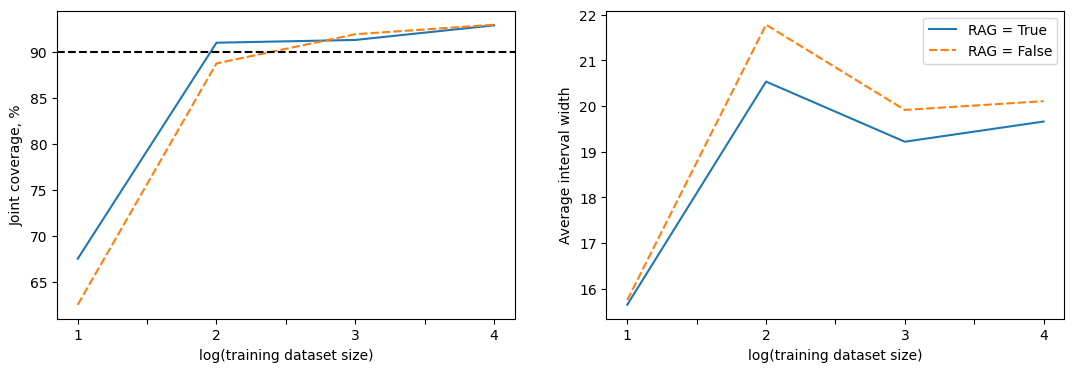

In [10]:
coverages_mean, coverages_std = {}, {}
for rag in [True, False]:
    coverages_mean[f'RAG = {rag}'], coverages_std[f'RAG = {rag}'] = \
        get_joint_coverages('CHRONOS_CONFORMAL', 'sample_complexity', seeds=range(4), extra_path_info=f'rag={rag}') # 5


widths_mean = {}
for rag in [True, False]:
    widths_mean[f'RAG = {rag}'], _ = \
        get_interval_widths('CHRONOS_CONFORMAL', 'sample_complexity', seeds=range(4), extra_path_info=f'rag={rag}') # 5

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))

figa = sns.lineplot(ax=ax1, data=coverages_mean, legend=None)
ax1.set_xticklabels([0,1,'',2,'',3,'',4])
figa.axhline(90, linestyle="--", color="black")
figa.set(xlabel="log(training dataset size)", ylabel="Joint coverage, %")
    
figb = sns.lineplot(ax=ax2, data=widths_mean)
ax2.set_xticklabels([0,1,'',2,'',3,'',4])
figb.set(xlabel="log(training dataset size)", ylabel="Average interval width")
plt.show()
fig.savefig('{}.png'.format('sample_complexity'), bbox_inches='tight', dpi=600)

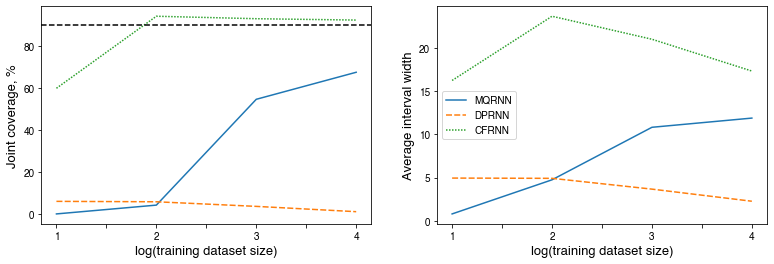

In [89]:
coverages_mean, coverages_std = {}, {}
for baseline in ['QRNN', 'DPRNN', 'CFRNN']:
    b = 'MQRNN' if baseline=='QRNN' else baseline
    coverages_mean[b], coverages_std[b] = \
        get_joint_coverages(baseline, 'sample_complexity', seeds=range(5))


widths_mean = {}
for baseline in ['QRNN', 'DPRNN', 'CFRNN']:
    b = 'MQRNN' if baseline=='QRNN' else baseline
    widths_mean[b], _ = \
        get_interval_widths(baseline, 'sample_complexity', seeds=range(5))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))

figa = sns.lineplot(ax=ax1, data=coverages_mean, legend=None)
ax1.set_xticklabels([0,1,'',2,'',3,'',4])
figa.axhline(90, linestyle="--", color="black")
figa.set(xlabel="log(training dataset size)", ylabel="Joint coverage, %")
    
figb = sns.lineplot(ax=ax2, data=widths_mean)
ax2.set_xticklabels([0,1,'',2,'',3,'',4])
figb.set(xlabel="log(training dataset size)", ylabel="Average interval width")
plt.show()
fig.savefig('{}.png'.format('sample_complexity'), bbox_inches='tight', dpi=600)

## Plotting

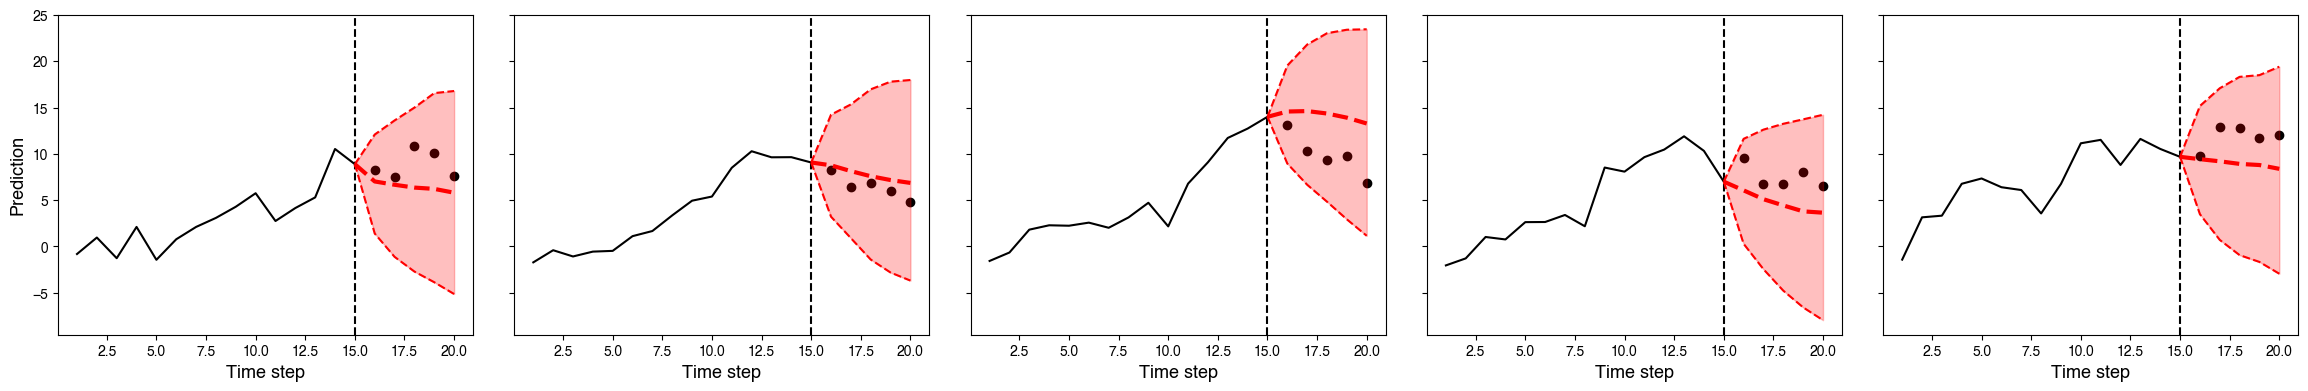

In [36]:
plot_timeseries(experiment='static', baseline='CHRONOS_CONFORMAL_ALL_DATA', index=range(6,7), figure_name='CHRONOS_CONFORMAL_ALL_DATA_static')

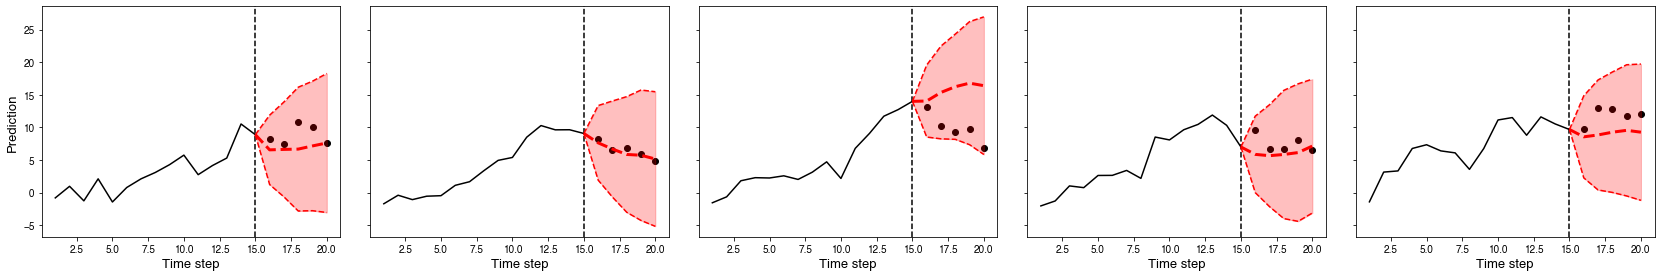

In [46]:
plot_timeseries(experiment='static', baseline='CFRNN', index=range(6,7), figure_name='CFRNN_static')

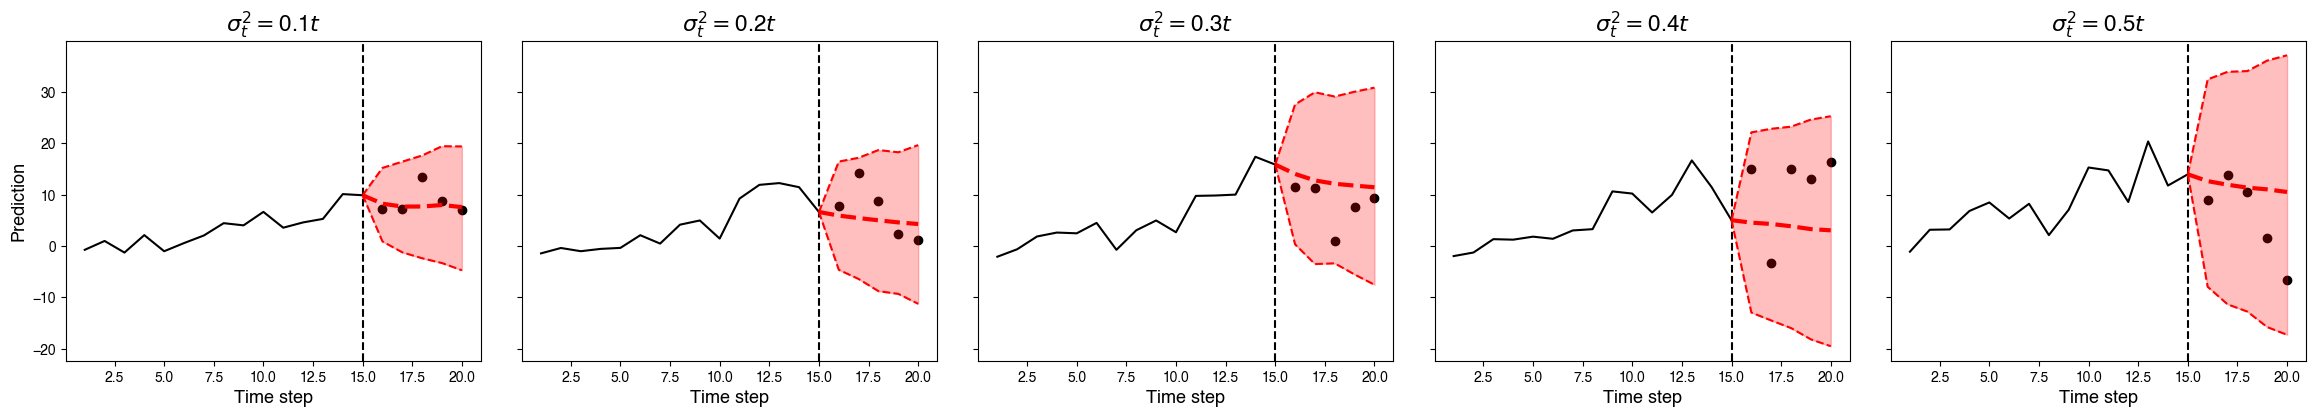

In [37]:
plot_timeseries(experiment='time_dependent', baseline='CHRONOS_CONFORMAL_ALL_DATA', index=range(6,7), figure_name='CHRONOS_CONFORMAL_ALL_DATA_time_dependent')

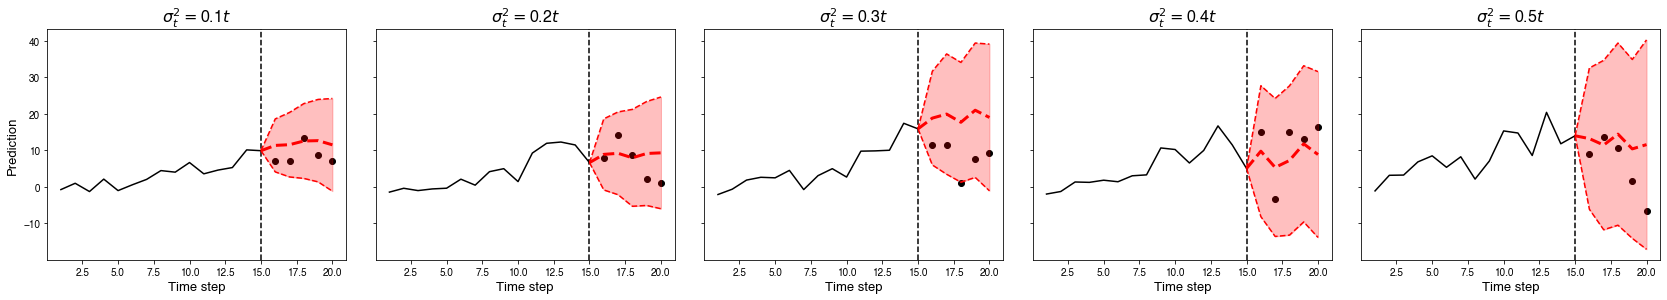

In [47]:
plot_timeseries(experiment='time_dependent', baseline='CFRNN', index=range(6,7), figure_name='CFRNN_time_dependent')

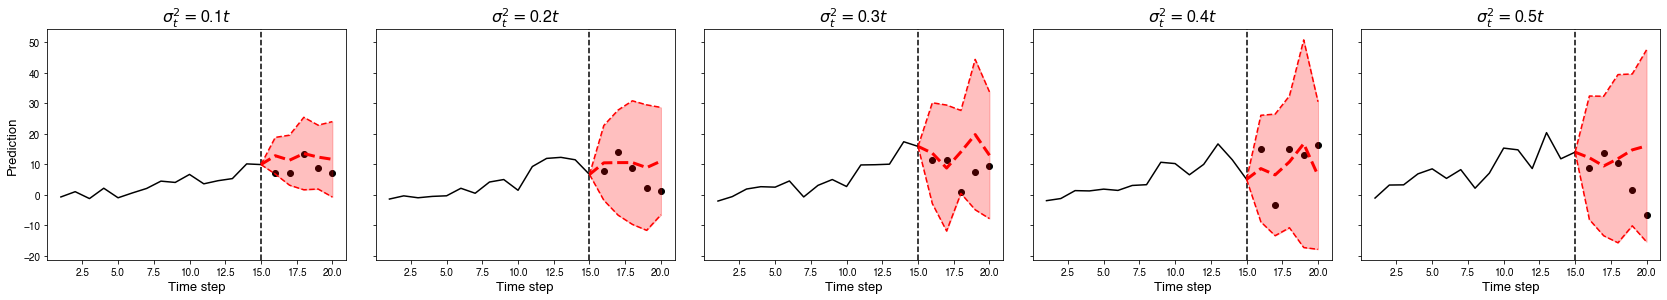

In [48]:
plot_timeseries(experiment='time_dependent', baseline='AdaptiveCFRNN', index=range(6,7), figure_name='CFRNN_adaptive')

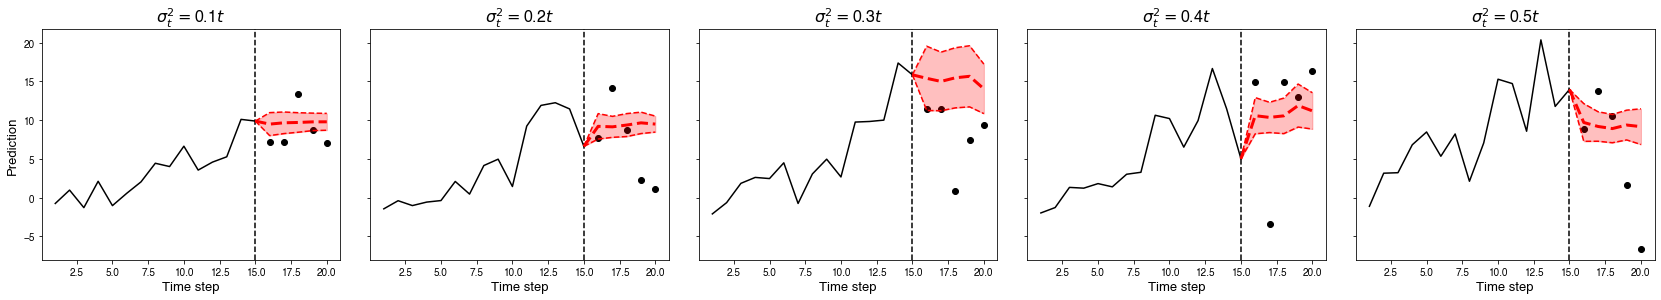

In [25]:
plot_timeseries(experiment='time_dependent', baseline='DPRNN', index=range(6,7), figure_name='DPRNN')

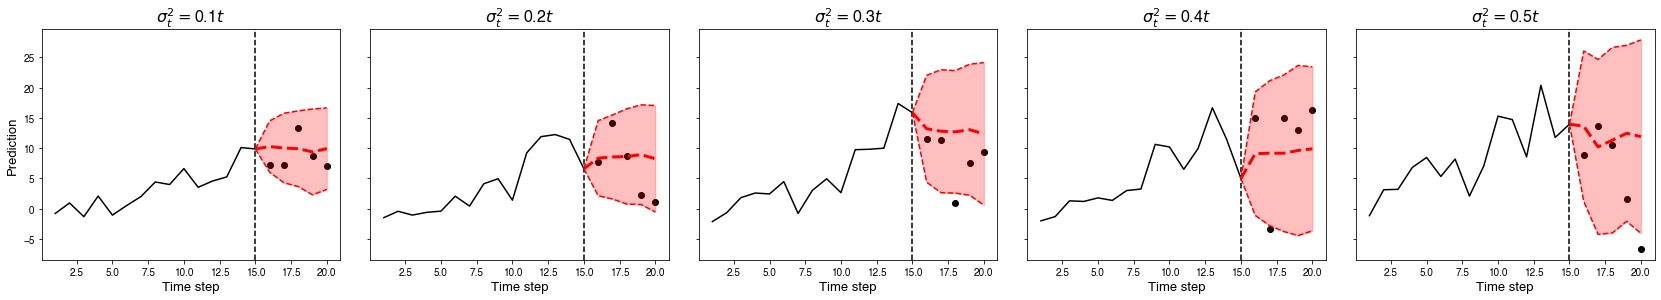

In [27]:
plot_timeseries(experiment='time_dependent', baseline='QRNN', index=range(6,7), figure_name='MQRNN')

## Long horizon analysis

Training code for the three underlying RNN models:

In [ ]:
for rnn_mode in ['LSTM', 'RNN', 'GRU']:
    run_synthetic_experiments(experiment='static', 
                              baseline='CFRNN',
                              horizon=100,
                              retrain_auxiliary=True,
                              recompute_dataset=True,
                              save_model=True, 
                              save_results=False, 
                              rnn_mode=rnn_mode)

Analyzing interval widths:

In [38]:
import torch
widths = {}
n_train=2000
for rag in [True, False]:
    model = torch.load(f'saved_models/static-CHRONOS_CONFORMAL_rag={rag}-LSTM-5-0-horizon100.pt')
    
    ws = []
    alphas = np.arange(100) * 0.01
    for alpha in alphas:
        corrected_alpha = alpha / model.horizon
        corrected_critical_calibration_scores = torch.tensor([[
                torch.quantile(
                    position_calibration_scores,
                    q=1 - corrected_alpha * n_train / (n_train + 1))
                for position_calibration_scores in feature_calibration_scores]
                for feature_calibration_scores in model.calibration_scores]).T
        ws.append(corrected_critical_calibration_scores.flatten().tolist())
    ws = np.array(ws)
    ws = ws * 2
    widths[f'RAG={rag}'] = ws

In [ ]:
import torch
widths = {}
n_train=2000
for rnn_model in ['LSTM', 'RNN', 'GRU']:
    model = torch.load('saved_models/static-CFRNN-{}-5-horizon100.pt'.format(rnn_model))
    
    ws = []
    alphas = np.arange(100) * 0.01
    for alpha in alphas:
        corrected_alpha = alpha / model.horizon
        corrected_critical_calibration_scores = torch.tensor([[
                torch.quantile(
                    position_calibration_scores,
                    q=1 - corrected_alpha * n_train / (n_train + 1))
                for position_calibration_scores in feature_calibration_scores]
                for feature_calibration_scores in model.calibration_scores]).T
        ws.append(corrected_critical_calibration_scores.flatten().tolist())
    ws = np.array(ws)
    ws = ws * 2
    widths[rnn_model] = ws

In [39]:
def compute_valid_horizons(threshold_width):
    valid_horizons = {}
    for rnn_model in widths:#['LSTM', 'RNN', 'GRU']:    
        T = []
        ws = widths[rnn_model]
        for i, _ in enumerate(alphas):
            t = 0
            while t < ws.shape[1] and ws[i, t] < threshold_width:
                t += 1
            T.append(t)
        valid_horizons[rnn_model] = np.array(T)
    return valid_horizons

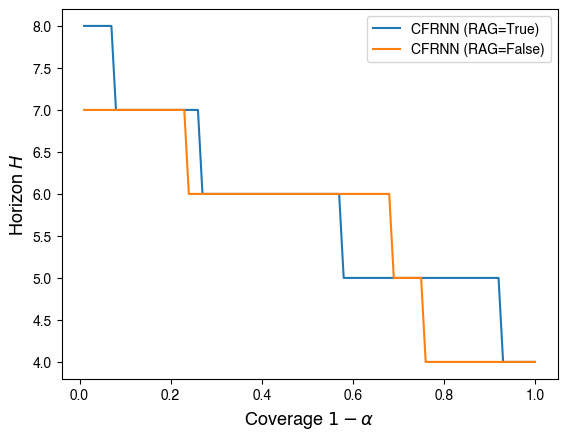

In [40]:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
plt.rcParams.update({'axes.titlesize': 16,
                     'axes.labelsize': 13})
for threshold_width in [28]:
    valid_horizons = compute_valid_horizons(threshold_width)
    for rnn_model in valid_horizons.keys():
        plt.plot(1-alphas, valid_horizons[rnn_model], label='CFRNN ({})'.format(rnn_model))
plt.xlabel('Coverage $1-\\alpha$')
plt.ylabel('Horizon $H$')
plt.legend()
plt.savefig('{}.png'.format('tradeoff') , bbox_inches='tight', dpi=1000)
plt.show()

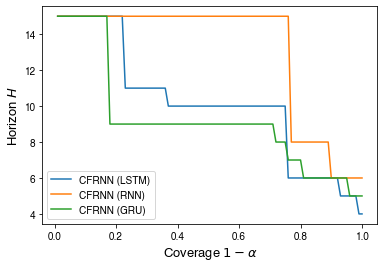

In [37]:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
plt.rcParams.update({'axes.titlesize': 16,
                     'axes.labelsize': 13})
for threshold_width in [28]:
    valid_horizons = compute_valid_horizons(threshold_width)
    for rnn_model in valid_horizons.keys():
        plt.plot(1-alphas, valid_horizons[rnn_model], label='CFRNN ({})'.format(rnn_model))
plt.xlabel('Coverage $1-\\alpha$')
plt.ylabel('Horizon $H$')
plt.legend()
plt.savefig('{}.png'.format('tradeoff') , bbox_inches='tight', dpi=1000)
plt.show()